<a href="https://colab.research.google.com/github/mohzary/python-deep-learning-f19/blob/master/M2ICP3/M2ICP3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_20newsgroups
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

#To fetch 20newsgroups training dataset
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

#To get the data labels and save them in y
y = twenty_train.target

# To assign the text data into sentences variable
sentences = twenty_train.data

#To Tokenize the sentences into words we set up the number of words to be 2000
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
# To represent the sentences as a numerical data we grt the text matrix of the sentences  
sentences = tokenizer.texts_to_matrix(sentences)

#To encode and process our data labels
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)


Using TensorFlow backend.


In [2]:
y.min()

0

In [0]:
# To split our dataset into testing and training
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [13]:
# First we create 3 layers of size 2000 for input layer and 300 for the hidden layer and 20 for the output we set the epochs to 50
model = Sequential()
model.add(layers.Dense(300,input_dim=2000, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=model.fit(X_train,y_train, epochs=50, verbose=True, validation_data=(X_test,y_test), batch_size=256)


Train on 8485 samples, validate on 2829 samples
Epoch 1/50
8485/8485 [==============================] - 1s 84us/step - loss: 2.1767 - acc: 0.4915 - val_loss: 1.3115 - val_acc: 0.7395
Epoch 2/50
8485/8485 [==============================] - 0s 32us/step - loss: 0.8763 - acc: 0.8262 - val_loss: 0.8243 - val_acc: 0.8042
Epoch 3/50
8485/8485 [==============================] - 0s 33us/step - loss: 0.5143 - acc: 0.8951 - val_loss: 0.6802 - val_acc: 0.8243
Epoch 4/50
8485/8485 [==============================] - 0s 33us/step - loss: 0.3501 - acc: 0.9369 - val_loss: 0.6173 - val_acc: 0.8282
Epoch 5/50
8485/8485 [==============================] - 0s 33us/step - loss: 0.2597 - acc: 0.9578 - val_loss: 0.5882 - val_acc: 0.8406
Epoch 6/50
8485/8485 [==============================] - 0s 32us/step - loss: 0.1967 - acc: 0.9725 - val_loss: 0.5718 - val_acc: 0.8353
Epoch 7/50
8485/8485 [==============================] - 0s 33us/step - loss: 0.1508 - acc: 0.9821 - val_loss: 0.5633 - val_acc: 0.8370
Epoch 8

In [14]:
# To get the Evaluation result on Test Data
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

2829/2829 [==============================] - 0s 60us/step
Evaluation result on Test Data : Loss = 0.783524376252971, accuracy = 0.8193708024879528


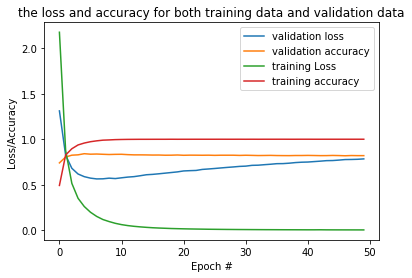

In [15]:

import matplotlib.pyplot as plt
import numpy as np


#To plot the loss and accuracy for both training data and validation data. 
plt.figure()
plt.plot(np.arange(0, 50), history1.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 50), history1.history["val_acc"], label="validation accuracy")
plt.plot(np.arange(0, 50), history1.history["loss"], label="training Loss")
plt.plot(np.arange(0, 50), history1.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [17]:
#We add embedding layer with flatten to check if the accuracy improved
from keras.layers import Embedding, Flatten
model2 = Sequential()
model2.add(Embedding(2000, 50, input_length=2000))
model2.add(Flatten())
model2.add(layers.Dense(300,input_dim=2000, activation='relu'))
model2.add(layers.Dense(20,activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

history2=model2.fit(X_train,y_train, epochs=20, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[test_loss, test_acc] = model2.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Train on 8485 samples, validate on 2829 samples
Epoch 1/20
8485/8485 [==============================] - 4s 512us/step - loss: 3.3578 - acc: 0.0937 - val_loss: 2.7700 - val_acc: 0.2517
Epoch 2/20
8485/8485 [==============================] - 3s 388us/step - loss: 2.4164 - acc: 0.4136 - val_loss: 1.9770 - val_acc: 0.5292
Epoch 3/20
8485/8485 [==============================] - 3s 387us/step - loss: 1.3973 - acc: 0.6780 - val_loss: 1.1500 - val_acc: 0.6882
Epoch 4/20
8485/8485 [==============================] - 3s 387us/step - loss: 0.7425 - acc: 0.8180 - val_loss: 0.8581 - val_acc: 0.7504
Epoch 5/20
8485/8485 [==============================] - 3s 390us/step - loss: 0.4730 - acc: 0.8798 - val_loss: 0.7152 - val_acc: 0.7869
Epoch 6/20
8485/8485 [==============================] - 3s 385us/step - loss: 0.3258 - acc: 0.9173 - val_loss: 0.6795 - val_acc: 0.7925
Epoch 7/20
8485/8485 [==============================] - 3s 387us/step - loss: 0.2318 - acc: 0.9480 - val_loss: 0.6783 - val_acc: 0.8077
